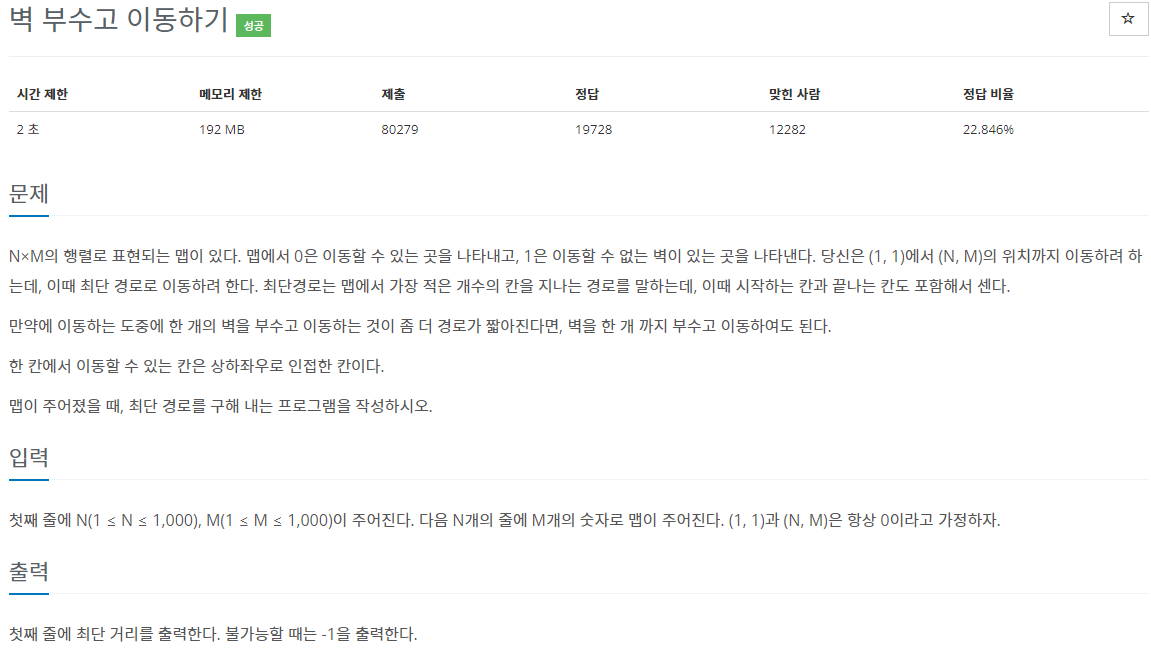

In [1]:
from collections import deque

def bfs():
    q = deque()
    q.append((0, 0, 1))
    visited[0][0][1] = 1
    while q:
        i, j, power = q.popleft()
        if (i, j) == (n - 1, m - 1):
            return visited[i][j][power]
        for di, dj in [[0, -1], [1, 0], [0, 1], [-1, 0]]:
            ni, nj = i + di, j + dj
            if 0 <= ni < n and 0 <= nj < m:
                if not arr[ni][nj] and not visited[ni][nj][power]:
                    visited[ni][nj][power] = visited[i][j][power] + 1
                    q.append((ni, nj, power))
                elif arr[ni][nj] and power:
                    visited[ni][nj][0] = visited[i][j][power] + 1
                    q.append((ni, nj, 0))
    return -1

n, m = map(int, input().split())
arr = [list(map(int, input())) for _ in range(n)]
visited = [[[0] * 2 for _ in range(m)] for _ in range(n)]
print(bfs())

7 8
01000000
01111110
01100000
01101111
01100000
01111110
00000010
14


---

### 처음 생각
- 벽이 없으면 전진
- 벽이 있고 부술 수 있으면 부수고 전진
- 4방향이 아닌 3방향...~~위로 갈 이유가 없다고 생각~~<br>

### 추가 아이디어
한 번의 부술 기회를 최적의 상황에 사용해야 한다 `-->` 나중에 부수는게 이득이라면 그 전에 기회 소비 ㄴㄴ `->` **벽이 있고 부술 수 있지만 안 부숴본다**<br>
벽을 부순 채로 visited에 숫자를 찍었고, 다른 평행세계에서 벽을 안 부순 채로 늦게 그 장소에 도착했다 하더라고 그 상황이 결론에선 정답이 될 수있으니 기록해두어야한다.<br>
### 해결 방안
visited 배열을 3차원으로 활용하기 visited[행][열][벽을 부순 적이 있나요]